<a href="https://colab.research.google.com/github/Poohi5/cmpe258_homework/blob/master/Graded_assignment2/Kerassparsecategoricalcrossentropy(softmax).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras to do sparse categorical crossentropy on Accesories having 7 Classes

###Downloaded images of Purse, Wallet, Sandals, Earrings, Phonecase, Bangles, NailArt from images.google.com

**Code:**
####Get urls
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));

####To save the urls of the images in a file
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n'))); 

##Using the images of Accessories to do Classification using Keras Sequential API along with Dropout

Import Fastai modules

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [3]:
import requests
import cv2
import os
 
from imutils import paths
import pandas as pd
from fastai.imports import *
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/purse.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('purse'):
    os.mkdir('purse')
image_path = 'purse'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTFTWuLghkDFQERBKmrJeVarpN1hLoZcWM6JUK7EwNny2qA5ft5&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRw-qju_TOHa-2w4sz23syXIj7COPWlCVD35y4Z7-2K5C_xywng&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRQvY6UNQQU6LMqgMoVG3cEPkb73aZBL_KMDeZUQToM65hKAo6-&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRQLjZrKZF_Q71Md8qJ6mRSBdYdpMSIaAtUyqlEvQ0U3f7LEZlA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTfJf0XVc-1yZh-kyVmvBOJenCmrP6U-IrGfCtiRLYGWVS67mB7&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ6ghgfi9REN0zekL13iktoWsjUi9_Y8erhmg7wKRCJcaT35zLt&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSLqsoZJ2Z12VOEw_8ckD9-LqlLgjzQwnEkoLhN0XaijC2iTr3s&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTp4haBaAJHmVcvd8rxw9CjbzD5zzLKNmsU0X2-6qlTGnAj6Com&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/wallet.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('wallet'):
    os.mkdir('wallet')
image_path = 'walltet'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvz0LkqFOpGh1IMNCznYh-K0QJUWTMQymyPrIexN4uVn8n_BYK&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTjr6NL47bffc8gKMwV-tRUuhEzgKUHU8basXtvlGYOXLqkx2BD&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT8l68Zdg5ZJNtpJpb3sBXsfnNEJUMAwq6gUUN5XcttvW_hb6fB&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTyOJxCMJnL0WIlSzI1_mYAwhjHhZ6b3Q_KeTnZji6IfU_4Cxv8&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQT8QgeI9UPnnyZPtYNS0BQAaEuAqLvPvkTcCu3fewUjMShzktM&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcREWmLxa35hZ9yy6kEbBmJazBVTOtB4BoGtDf7IikgwtDFzj7HU&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSbnPBdUmOBB2kSf6ezBcQ3RsXehabGLy9thMfhOs54vHYWosJ1&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRPFwIHIfUZS7ZthYm4KPZQGLG_uh8x9yuGGtjdzTHMVkI4EH1w&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/phonecase.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('phonecase'):
    os.mkdir('phonecase')
image_path = 'phonecase'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQm08cEdayjb9DRJMoNGYGJAQVhb_yOknUkFFpwZeDO9hP0dG7N&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTuauDBk6hjyBMtq53gIz89vTb93TpO32-rULJVZ6X33kXtaJeP&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRC5eiqHqZblLTYm-nj20vYf38OwSuVfyJrnE3aw1FnHJ9hZqgY&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTMEgBlVJiw9VtlVitS_u5wgHRZkFaJGNsioyeaOEXn01rg20gN&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTwkH1jrsPlImoCGIUphf_G5Give_aSKPbTQZEhxg_4v1WuRc2X&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ_higIvlU3_GDFjHvY_wy1ejhAv8I5jZk9ifjQipgVoTtFHKNM&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRdl4e8IYusp7khvVyfEprI8oeSPftJ1d8vLdXiRXHpAKVIc2Gd&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQOvfO3yoM9dRcL1zXcoEdyToED1oRIL0Wiysh7Cdu5OTPPuDcL&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/earrings.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('earrings'):
    os.mkdir('earrings')
image_path = 'earrings'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQQe_L9CJNyu3omCJ9oaSb9r9MFugxsE_h9GvAzRzHONF3P4-hl&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTyC80mp5jvhrt5_bO4IkNrZMZafUZu3fpHu7Nlc0y5tqkOeYix&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTXp468xwiJ9QnjYP60wKhGBslU2BVZAnIQYLSHM3m4LurefyRI&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSXWMw0wMM8iUKronThTlQRUgG_WpKmSgeHs_APR3b4m91qhCNK&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRE86Bo_5eZRJYZXgRIVK7m80EecOHmUBi0kxVR2kXkEtnpeGNZ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRQ9ORxW4UbxiuspWx-zdcW_mDXQ0r90mlW6c54B7kcqo7O1tI9&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQkVo5Y18vSA19nAkRvIpGP1F2CT9Td1mZruoTCtO8D6z4FJkuE&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQELRf9JZbcIgrjY-VHfznnaiePsA_utgkB4A95x1cLbgIbsULO&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/bangles.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('bangles'):
    os.mkdir('bangles')
image_path = 'bangles'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ4Yu80ReDRbo-kyFvuac_VimX47cv_7eWA1ALMTMPNO9KnCUpC&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQrIxDmlYB2ZMAtCMdxcoTsjkZF2Jr8Du-n4ajqKN1FD9kmlB0U&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSJA-ork_OPIY_gHWfmKOy3a4iFDq6kWMp4gNp5G1_iFuNZLf0b&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSm_lWiKKwekKCBKqpBVPw4ZlwrqNacfc3KOgAYZLAp6ukkSbNZ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQDshaTstH72dRrpSFFOSHIcSqW0Qr3FwE9pLZ2lAuE-FS_4T93&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSBajK4X9I6072dSZbkmpAKq6RsKLxJkiskBuueQiuY4NO5hcKf&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRpP8azct8ss9pDeTt3a1oiEEeHQRkXpoAGOll1jvmPHJtfeduJ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSNRksP7fQ5-B2sPUWMNNQXhBWDaIVtc7aIl_wYbwGTtjAz6RHZ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/nailart.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('nailart'):
    os.mkdir('nailart')
image_path = 'nailart'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQoBE5VF--iR0569RCnUOiu2jrxvOe_kjzcq40dedeDiAedvFr-&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSaCIwH5dM3aZB-QYsZqSD5YmyWfEOcGsOWXdrINUS2ofGUQ0hs&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ0iKHBzl3D5UzfV75BnLlX8b-Xpv2Cc5d2l4IUTPtClGaDE3S4&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSyQo-CbADwG-3ahW5Z8cCQIIoNzXVF1-B0QEmjDkpHxaKRU4ky&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTgipHPSZwgGdeNFPBxLbrNv-iL4o4z9feXumCihHkWapoY85B3&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTwVH5pDKqJr89WRn_-vePXKy5p-Xb2lFW38tekPOYkt6MscpNS&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCS9ITgMB_6Mt5vJZECOPEnuvGwu4L23Y2B692oglVwbU72Fjg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRy3qH4LFOn1bCaMRfOBzh2L2XPiXNOioq3lnJBcgVo5bF8_2xf&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/Poohi5/cmpe258_homework/master/Graded_assignment2/sandals.csv', sep='delimiter', header=None)
data=data[0]
data.to_csv('download',index=False)

url_path = open('download').read().strip().split('\n')
total = 0
print(url_path)
if not os.path.exists('sandals'):
    os.mkdir('sandals')
image_path = 'sandals'
 
for url in url_path:
    try:
        print(url)
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


['0', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSjwBXAv83N_hqBikJ5UBa0Y7vDMLFQ3U31CIHm0CT_giLfuEQI&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQO-CtVteR0oTN0_cgA6ouKTuKyI0z3vWUae4ah6qmEtW8OGgun&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQYzj1pH4RSKB33w0yOxbuAUwse3_KrVeHkGX72f2cyumjPkE3n&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRzv9j6jRtUQVY2USaMSyyEJERMWAU9wwsXYU9wLzpUVtX8Bp0U&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSjiseJi_0kxcHGo-BE0BCUZZ7zGL5CDhH5o3sZdrhNm92Th-o2&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRmnQ7X2Yi1_ch7IV9QTl5Yd5pz6UAQKDR5TdIQVw8RmvG6Ea_K&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT6R0LzmgZLSatbO7rDmbgNQpcybo51fzZPNO8GfI8Sdl_JA383&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS1oEI3gL8dEyN0oPFtOqBzGA5bm36tWe5SNe9qCdKk4_oJxhxq&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images

#Modeling

In [0]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import matplotlib.pyplot as plt

In [0]:
def get_size_statistics(DIR):
  heights = []
  widths = []
  for img in os.listdir(DIR): 
    path = os.path.join(DIR, img)
    data = np.array(Image.open(path)) #PIL Image library
    heights.append(data.shape[0])
    widths.append(data.shape[1])
  avg_height = sum(heights) / len(heights)
  avg_width = sum(widths) / len(widths)
  print("Average Height: " + str(avg_height))
  print("Max Height: " + str(max(heights)))
  print("Min Height: " + str(min(heights)))
  print('\n')
  print("Average Width: " + str(avg_width))
  print("Max Width: " + str(max(widths)))
  print("Min Width: " + str(min(widths)))

In [12]:
get_size_statistics("/content/purse")

Average Height: 222.18125
Max Height: 327
Min Height: 104


Average Width: 231.496875
Max Width: 486
Min Width: 154


In [13]:
get_size_statistics("/content/earrings")

Average Height: 236.096875
Max Height: 301
Min Height: 162


Average Width: 216.425
Max Width: 311
Min Width: 167


In [14]:
get_size_statistics("/content/phonecase")

Average Height: 224.015625
Max Height: 366
Min Height: 147


Average Width: 230.7875
Max Width: 343
Min Width: 138


In [0]:
def label_img(DIR):
  # word_label = name.split('-')[0]
  if DIR == '/content/purse' : return np.array([0])
  elif DIR == '/content/wallets' : return np.array([1])
  elif DIR == '/content/phonecase' : return np.array([2])
  elif DIR == '/content/earrings' : return np.array([3])
  elif DIR == '/content/bangles' : return np.array([4])
  elif DIR == '/content/sandals' : return np.array([5])
  elif DIR == '/content/nailart' : return np.array([6])

In [0]:
IMG_SIZE = 300
def load_training_data(DIR):
  train_data = []
  # train_data_output = []
  for img in os.listdir(DIR):
    label = label_img(DIR)
    path = os.path.join(DIR, img)
    img = Image.open(path)
    img = img.convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    train_data.append([np.array(img),label])
    # train_data_output.append([label])
  # shuffle(train_data)
  return train_data

In [0]:
train_data_purse = load_training_data("/content/purse")

In [18]:
train_data_purse

[[array([[255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         ...,
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255]], dtype=uint8),
  array([0])],
 [array([[255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         ...,
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [254, 254, 254, 254, ..., 255, 255, 255, 255],
         [254, 254, 254, 254, ..., 255, 255, 255, 255]], dtype=uint8),
  array([0])],
 [array([[ 35,  

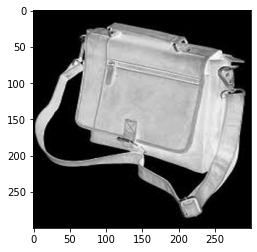

In [19]:
plt.imshow(train_data_purse[10][0], cmap = 'gist_yarg')

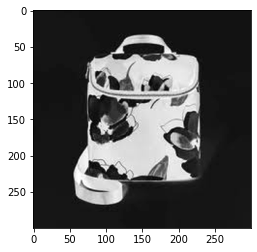

In [20]:
plt.imshow(train_data_purse[12][0], cmap = 'gist_yarg')

In [0]:
train_data_wallet = load_training_data("/content/wallet")

In [0]:
train_data_phonecase = load_training_data("/content/phonecase")

In [0]:
train_data_earrings = load_training_data("/content/earrings")

In [0]:
train_data_bangles = load_training_data("/content/bangles")

In [0]:
train_data_nailart = load_training_data("/content/nailart")

In [0]:
train_data_sandals = load_training_data("/content/sandals")

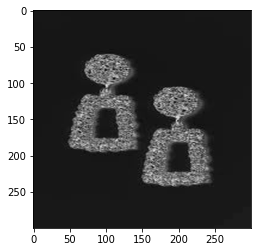

In [27]:
plt.imshow(train_data_earrings[1][0], cmap = 'gist_yarg')

In [0]:
train_data = train_data_purse + train_data_wallet + train_data_earrings + train_data_bangles + train_data_nailart +  train_data_phonecase + train_data_sandals

In [29]:
train_data

[[array([[255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         ...,
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255]], dtype=uint8),
  array([0])],
 [array([[255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         ...,
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [255, 255, 255, 255, ..., 255, 255, 255, 255],
         [254, 254, 254, 254, ..., 255, 255, 255, 255],
         [254, 254, 254, 254, ..., 255, 255, 255, 255]], dtype=uint8),
  array([0])],
 [array([[ 35,  

In [0]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(7, activation = 'softmax'))

In [0]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [0]:
model.fit(trainImages, trainLabels, batch_size = 10, epochs = 30, verbose = 1)

Epoch 1/30
1920/1920 [==============================] - 289s 151ms/step - loss: 1.6889 - accuracy: 0.4589
Epoch 2/30
1920/1920 [==============================] - 295s 154ms/step - loss: 1.0657 - accuracy: 0.6385
Epoch 3/30
1920/1920 [==============================] - 291s 152ms/step - loss: 0.7205 - accuracy: 0.7521
Epoch 4/30
1920/1920 [==============================] - 285s 149ms/step - loss: 0.4874 - accuracy: 0.8297
Epoch 5/30
1920/1920 [==============================] - 286s 149ms/step - loss: 0.3381 - accuracy: 0.8906
Epoch 6/30
1920/1920 [==============================] - 286s 149ms/step - loss: 0.2558 - accuracy: 0.9141
Epoch 7/30
1920/1920 [==============================] - 286s 149ms/step - loss: 0.1830 - accuracy: 0.9443
Epoch 8/30
1920/1920 [==============================] - 287s 150ms/step - loss: 0.1720 - accuracy: 0.9370
Epoch 9/30
1920/1920 [==============================] - 293s 152ms/step - loss: 0.1737 - accuracy: 0.9396
Epoch 10/30
1920/1920 [=======================